Мой вариант:
Направления исследования - Увеличение количества созданных новых рабочих мест МСП

Зависимые переменные: 
* 4.1 Созданные новые рабочие места МСП; 
* 4.2 Отношение созданных новых рабочих мест МСП к численности населения в субъектах Российской Федерации; 
* 4.3 Отношение созданных новых рабочих мест МСП к ВРП в субъектах Российской Федерации

Вопросы исследования:

1. Какие факторы в наибольшей степени влияют на создание новых рабочих мест МСП в субъектах Российской Федерации? 
2. Прослеживается ли взаимосвязь между размером бюджета субъекта Российской Федерации и созданием новых рабочих мест МСП по отношению к ВРП? 
3. Влияют ли какие-то меры государственной поддержки на соотношение новых рабочих мест и ВРП? 
4. Можно ли утверждать, что рост ВРП субъекта Российской Федерации в определенной степени обусловлен новыми рабочими местами МСП? 
5. По отношению к какому фактору корректнее измерять отношение созданных новых рабочих мест МСП – к численности населения или ВРП? Какие меры государственной поддержки влияют на создание новых рабочих мест? 
6. Является ли государственная политика по стимулированию создания МСП физическими лицами до 30 лет эффективной? 

Охарактеризуйте и интерпретируйте динамику изменения анализируемых переменных по годам. Подготовьте предложения по интенсификации темпов создания новых рабочих мест МСП.

Последовательность выполнения:
1) Самостоятельная постановка исследовательских гипотез;
2) Обоснование выбора модели анализа панельных данных, релевантной для проверки поставленных гипотез;
3) Проверка гипотез на данных готовой базы МСП;
4) Оценка и проверка качества эконометрических моделей;
5) Формулировка выводов по результатам проведенного анализа;
6) Расчёт и анализ показателей динамики изменения рассматриваемых переменных по годам (абсолютный прирост, темп прироста, среднегодовой темп прироста);
7) Подготовка графических материалов, содержащих сравнительный анализ (рейтингование) положения субъектов Российской Федерации относительно друг друга по выбранному направлению исследования, а также в разрезе федеральных округов. Для подготовки графиков можно использовать как исходные, так и преобразованные переменные, а также показатели динамики изменения анализируемых переменных;
8) Краткое описание и интерпретация модели панельных данных и графических материалов в формате презентации;

In [1]:
import pandas as pd

In [12]:
import pandas as pd
data = pd.read_excel('1.xlsx')
data.head()

,Region,year,District,Rabotniki,SubMSP,Vnovsozd,oborot,InvestFC,fedsub,minekfed,...,biznav,mfc,im,rgo,rgolim,infrmoney,infrrazv,suppmsp,vrp,budg
0,Алтайский край,1,СФО,263673,77860,11718,6.933102e+11,2.260857e+10,158385000.0,158.000000,...,50.0,1122.0,289,8.739152e+08,22500000.0,83.000000,67.0,1127,498789.100000,83045.092458
1,Алтайский край,2,СФО,222950,78258,11949,5.479026e+11,1.665463e+10,127666500.0,128.000000,...,53.0,1220.0,406,8.902742e+08,25000000.0,112.000000,74.0,1195,554754.748351,89688.699855
2,Алтайский край,3,СФО,225284,78723,12370,6.031799e+11,2.317985e+10,104584200.0,160.674157,...,76.0,1342.0,651,8.243280e+08,25000000.0,69.350621,81.4,1374,621029.969998,95697.842745
3,Амурская область,1,ДФО,85504,26942,3749,2.110497e+11,1.419203e+10,72010000.0,72.000000,...,34.0,99.0,535,1.490009e+09,13500000.0,1.000000,2.0,1176,287594.300000,48534.136869
4,Амурская область,2,ДФО,74273,26712,3710,1.645900e+11,1.502950e+10,65439500.0,55.000000,...,36.0,108.0,607,1.166688e+09,15000000.0,3.000000,2.0,1605,319863.251871,52416.867819


In [14]:
data.columns

Index(['Region', 'year', 'District', 'Rabotniki', 'SubMSP', 'Vnovsozd',
       'oborot', 'InvestFC', 'fedsub', 'minekfed', 'minekreg', 'fz22344_',
       'saldfinresult', 'newrabmesta', 'newSMBdo30_', 'naselenie', 'do30mer',
       'edu30_', 'regsof', 'corpmsp', 'mspbank', 'trening', 'serv', 'biznav',
       'mfc', 'im', 'rgo', 'rgolim', 'infrmoney', 'infrrazv', 'suppmsp', 'vrp',
       'budg'],
      dtype='object')

### №1
Гипотезы для Исследования
1) Основные Факторы, Влияющие на Создание Новых Рабочих Мест в МСП:

    Гипотеза 1.1: "ВРП субъекта РФ имеет значительное влияние на количество созданных новых рабочих мест в МСП."
    Гипотеза 1.2: "Бюджет субъекта РФ коррелирует с количеством новых рабочих мест в МСП."

2) Взаимосвязь Между Размером Бюджета и Созданием Новых Рабочих Мест относительно ВРП:

    Гипотеза 2.1: "Существует положительная связь между размером бюджета субъекта РФ и отношением созданных новых рабочих мест МСП к ВРП."

3) Влияние Мер Государственной Поддержки:

    Гипотеза 3.1: "Меры государственной поддержки МСП влияют на увеличение числа созданных новых рабочих мест."

4) Связь Между Ростом ВРП и Новыми Рабочими Местами МСП:

    Гипотеза 4.1: "Рост ВРП субъекта РФ положительно влияет на количество созданных новых рабочих мест в МСП."

5) Соотношение Новых Рабочих Мест к Численности Населения и ВРП:

    Гипотеза 5.1: "Отношение созданных новых рабочих мест МСП к численности населения более значимо, чем к ВРП."

6) Эффективность Государственной Политики по Стимулированию МСП среди Молодежи:

    Гипотеза 6.1: "Государственная политика по стимулированию создания МСП молодыми людьми до 30 лет эффективно способствует увеличению новых рабочих мест."

### №2

Созданные новые рабочие места МСП: Это количество новых рабочих мест, созданных в секторе МСП. В датасете это соответствует колонке 'Vnovsozd'.

Отношение созданных новых рабочих мест МСП к численности населения: Это отношение количества созданных рабочих мест к общей численности населения в каждом субъекте РФ. В датасете это рассчитывается как 'Vnovsozd' делённое на 'naselenie'.

Отношение созданных новых рабочих мест МСП к ВРП: Это отношение количества созданных рабочих мест к валовому региональному продукту субъекта РФ. В датасете это рассчитывается как 'Vnovsozd' делённое на 'vrp'.

In [19]:
from linearmodels import PanelOLS
import statsmodels.api as sm

data = data.set_index(['Region', 'year'])

# Определение зависимых и независимых переменных для каждой гипотезы также примем во внимание наши условия
# Гипотезы 1.1 и 1.2: Влияние ВРП, бюджета и численности населения на создание рабочих мест в МСП
Y1 = data['Vnovsozd']
X1 = data[['vrp', 'budg', 'naselenie']]
X1 = sm.add_constant(X1)

# Гипотезы 2 и 3: Влияние размера бюджета и мер господдержки на отношение созданных рабочих мест к ВРП
Y2 = data['Vnovsozd'] / data['vrp']
X2 = data[['budg', 'fedsub', 'minekfed']]
X2 = sm.add_constant(X2)

# Гипотеза 4: Влияние роста ВРП на количество созданных рабочих мест в МСП
Y3 = data['Vnovsozd']
X3 = data['vrp']
X3 = sm.add_constant(X3)

# Гипотезы 5.1 и 5.2: Сравнение значимости отношения созданных рабочих мест к населению и к ВРП
Y4 = data['Vnovsozd'] / data['naselenie']
Y5 = data['Vnovsozd'] / data['vrp']
X4 = data[['budg', 'fedsub', 'minekfed', 'naselenie']]
X5 = data[['budg', 'fedsub', 'minekfed', 'vrp']]
X4 = sm.add_constant(X4)
X5 = sm.add_constant(X5)

# Гипотеза 6: Влияние госполитики по стимулированию МСП молодежью на создание рабочих мест
Y6 = data['Vnovsozd']
X6 = data[['newSMBdo30_', 'do30mer']]
X6 = sm.add_constant(X6)

# Создание моделей PanelOLS для каждой гипотезы и вывод результатов
results = {
    'Hypothesis 1.1 & 1.2': PanelOLS(Y1, X1, entity_effects=True).fit(),
    'Hypotheses 2 & 3': PanelOLS(Y2, X2, entity_effects=True).fit(),
    'Hypothesis 4': PanelOLS(Y3, X3, entity_effects=True).fit(),
    'Hypotheses 5.1 & 5.2 (naselenie)': PanelOLS(Y4, X4, entity_effects=True).fit(),
    'Hypotheses 5.1 & 5.2 (vrp)': PanelOLS(Y5, X5, entity_effects=True).fit(),
    'Hypothesis 6': PanelOLS(Y6, X6, entity_effects=True).fit()
}

for name, result in results.items():
    print(f"Model for {name}:")
    print(result.summary)
    print("\n" + "-"*50 + "\n")


Model for Hypothesis 1.1 & 1.2:
                          PanelOLS Estimation Summary                           
Dep. Variable:               Vnovsozd   R-squared:                        0.0623
Estimator:                   PanelOLS   R-squared (Between):              0.8946
No. Observations:                 255   R-squared (Within):               0.0623
Date:                Fri, Dec 22 2023   R-squared (Overall):              0.8928
Time:                        03:24:12   Log-likelihood                   -2079.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.7015
Entities:                          85   P-value                           0.0130
Avg Obs:                       3.0000   Distribution:                   F(3,167)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             3.7

На основе данных результатов моделей панельного анализа, давайте рассмотрим, как они соотносятся с нашими гипотезами:

### Гипотезы 1.1 и 1.2: Влияние ВРП, бюджета и численности населения на создание рабочих мест в МСП
- **R-квадрат**: 0.0623, указывает на низкую объяснительную силу модели.
- **Коэффициенты**: ВРП, бюджет и численность населения не оказали статистически значимого влияния на количество созданных новых рабочих мест в МСП.
- **Вывод**: Гипотезы не подтверждаются, так как не было найдено значимого влияния этих факторов.

### Гипотезы 2 и 3: Влияние размера бюджета и мер господдержки на отношение созданных рабочих мест к ВРП
- **R-квадрат**: 0.1075, что является низким, но лучше, чем в первой модели.
- **Коэффициенты**: Меры государственной поддержки (fedsub) оказали значимое положительное влияние, в то время как меры поддержки minekfed показали отрицательное влияние. Бюджет не оказал значимого влияния.
- **Вывод**: Гипотезы частично подтверждаются, указывая на влияние мер господдержки.

### Гипотеза 4: Влияние роста ВРП на количество созданных рабочих мест в МСП
- **R-квадрат**: 0.0488, очень низкий.
- **Коэффициенты**: ВРП показал положительное и статистически значимое влияние.
- **Вывод**: Гипотеза подтверждается, указывая на положительную связь между ВРП и созданием рабочих мест.

### Гипотезы 5.1 и 5.2: Сравнение значимости отношения созданных рабочих мест к населению и к ВРП
- **R-квадрат**: Низкий для обеих моделей.
- **Коэффициенты**: Для модели с населением (naselenie) нет значимых факторов, для модели с ВРП (vrp) есть некоторое положительное влияние.
- **Вывод**: Не найдено четкого доказательства того, что один показатель более значим, чем другой.

### Гипотеза 6: Влияние госполитики по стимулированию МСП молодежью на создание рабочих мест
- **R-квадрат**: Очень низкий.
- **Коэффициенты**: Не было найдено значимого влияния переменных, связанных с мерами для молодежи.
- **Вывод**: Гипотеза не подтверждается.

### Общий Вывод
Результаты показывают, что большинство гипотез не нашли четкого подтверждения в данных. Однако было обнаружено, что рост ВРП положительно влияет на количество созданных рабочих мест в МСП, а некоторые меры государственной поддержки оказывают влияние на отношение созданных рабочих мест к ВРП. Это предполагает, что другие, не учтенные в модели, факторы могут играть значительную роль в создании новых рабочих мест в секторе МСП.

### №3

In [24]:
# Используем residuals и X1 (наш набор независимых переменных) для теста гетероскедастичности
bp_test = het_breuschpagan(residuals, X1)
print('Breusch-Pagan test:', bp_test)


Breusch-Pagan test: (121.40173962694321, 3.850648326047598e-26, 76.028526522411, 5.140420042225806e-35)


Отлично, теперь у нас есть результаты теста Бреуша-Пагана на гетероскедастичность. Теперь интерпретируем их:

Тест Бреуша-Пагана возвращает четыре значения: LM статистику, p-значение для LM статистики, F-статистику и p-значение для F-статистики. Наши результаты:

1. **LM статистика**: 121.40
2. **P-значение для LM статистики**: \(3.85 \times 10^{-26}\)
3. **F-статистика**: 76.03
4. **P-значение для F-статистики**: \(5.14 \times 10^{-35}\)

### Интерпретация

- **LM и F-статистики** указывают на силу свидетельства против нулевой гипотезы о гомоскедастичности (однородности дисперсии ошибок).
- **P-значения** говорят о статистической значимости результатов. Чем ниже p-значение, тем сильнее основания отвергнуть нулевую гипотезу.

В данном случае оба p-значения крайне малы (\(3.85 \times 10^{-26}\) и \(5.14 \times 10^{-35}\)), что говорит о том, что мы можем с высокой степенью уверенности отвергнуть нулевую гипотезу о гомоскедастичности. Это означает, что наши данные имеют проблему гетероскедастичности, и стандартные ошибки наших оценок могут быть искажены.

Для оценки и проверки качества моих эконометрических моделей, мне потребуется выполнить следующие шаги:

1) Коэффициент детерминации (R-квадрат): Это уже выполнено, и как я отметила, значения R-квадрат были относительно низкими.

2) P-значения коэффициентов: Также уже были предоставлены. Некоторые коэффициенты оказались статистически значимыми, что указывает на их потенциальное влияние на зависимые переменные.

3) Диагностика мультиколлинеарности (VIF):

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['vrp', 'budg', 'naselenie']]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


    Variable        VIF
0      const   2.373697
1        vrp  44.491688
2       budg  41.642220
3  naselenie   3.691037


Проверка гетероскедастичности:

In [28]:
# Сначала обучаем модель
fitted_model = PanelOLS(Y1, X1, entity_effects=True).fit()

# Получаем остатки из обученной модели
residuals = fitted_model.resids

# Используем исходные данные X1, преобразованные в подходящий формат
X1_dataframe = X1.reset_index(drop=True)
# Проведение теста Бреуша-Пагана
bp_test = het_breuschpagan(residuals, X1_dataframe)

print('Breusch-Pagan test:', bp_test)



Breusch-Pagan test: (121.40173962694321, 3.850648326047598e-26, 76.028526522411, 5.140420042225806e-35)


Проверка автокорреляции:

In [27]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(fitted_model.resids)

print('Durbin-Watson test:', dw_test)


Durbin-Watson test: 2.314847889226508


Теперь у меня есть результаты для диагностики мультиколлинеарности (VIF), теста Бреуша-Пагана на гетероскедастичность и теста Дарбина-Уотсона на автокорреляцию. Давайте проанализируем их:

### 3) Диагностика мультиколлинеарности (VIF - Фактор Инфляции Дисперсии)
- **vrp**: VIF более 44, что значительно выше порога 5 или 10, обычно используемого для обозначения серьезной мультиколлинеарности.
- **budg**: Аналогично, VIF около 41 также указывает на сильную мультиколлинеарность.
- **naselenie**: VIF около 3.7, что меньше общепринятого порога, но всё же достаточно высокое значение.

**Вывод по мультиколлинеарности**: Наличие высоких значений VIF для переменных `vrp` и `budg` указывает на возможную проблему мультиколлинеарности. Это приведет к нестабильности коэффициентов модели и их трудноинтерпретируемости.

### 4) Тест Бреуша-Пагана на гетероскедастичность
- **Тест показал очень низкие p-значения** (3.85e-26 и 5.14e-35), что указывает на наличие гетероскедастичности в остатках модели.

**Вывод по гетероскедастичности**: Результаты теста говорят о том, что предположение об однородности дисперсии ошибок модели нарушается. Это может привести к неэффективным и смещенным оценкам стандартных ошибок коэффициентов.

### 5) Тест Дарбина-Уотсона на автокорреляцию
- **Значение**: 2.3148. Значения теста Дарбина-Уотсона обычно варьируются от 0 до 4, где значение около 2 указывает на отсутствие автокорреляции.

**Вывод по автокорреляции**: Значение теста Дарбина-Уотсона близко к 2, что говорит об отсутствии автокорреляции первого порядка в остатках модели.

### Общий Вывод
- **Модели имеют проблему мультиколлинеарности** (особенно для переменных `vrp` и `budg`), что требует дальнейшего исследования и возможного изменения спецификации модели.
- **Наличие гетероскедастичности** требует использования робастных методов оценки стандартных ошибок (например, робастных к гетероскедастичности стандартных ошибок в оценках коэффициентов).
- **Отсутствие автокорреляции** является положительным аспектом, указывающим на адекватность модели в этом отношении.

### №5

На основе результатов анализа данных и оценки качества эконометрических моделей, давайте сформулируем выводы по каждой из шести гипотез:

### Гипотеза 1.1 и 1.2: Влияние экономических и демографических факторов на создание рабочих мест в МСП
- **Вывод**: Гипотезы не подтверждаются. Ни ВРП, ни бюджет, ни численность населения не показали статистически значимого влияния на создание новых рабочих мест в МСП. Высокая мультиколлинеарность между ВРП и бюджетом также указывает на потенциальные проблемы в интерпретации этих переменных.

### Гипотезы 2 и 3: Влияние бюджета и мер господдержки на отношение созданных рабочих мест к ВРП
- **Вывод**: Гипотезы частично подтверждаются. Было обнаружено, что меры государственной поддержки оказывают значимое влияние на отношение созданных рабочих мест к ВРП, в то время как влияние бюджета оказалось нестатистически значимым.

### Гипотеза 4: Влияние ВРП на количество созданных рабочих мест в МСП
- **Вывод**: Гипотеза подтверждается. ВРП показал статистически значимое положительное влияние на количество созданных новых рабочих мест в МСП.

### Гипотезы 5.1 и 5.2: Сравнение значимости отношения созданных рабочих мест к населению и ВРП
- **Вывод**: Гипотезы не подтверждаются однозначно. Не было найдено четких доказательств того, что один из этих показателей более значим, чем другой. Однако было обнаружено некоторое влияние мер государственной поддержки.

### Гипотеза 6: Влияние политики по стимулированию МСП среди молодежи на создание рабочих мест
- **Вывод**: Гипотеза не подтверждается. Переменные, связанные с мерами для молодежи, не показали статистически значимого влияния на создание новых рабочих мест в МСП.

### Общий Вывод
- Анализ показал, что многие из рассматриваемых факторов не оказали значимого влияния на создание рабочих мест в секторе МСП. Однако некоторые меры государственной поддержки и рост ВРП имеют положительное влияние.
- Проблемы мультиколлинеарности и гетероскедастичности, выявленные в анализе, указывают на необходимость дальнейшего уточнения моделей и возможного включения дополнительных переменных или изменения спецификации моделей для более точного исследования взаимосвязей между переменными.

### №6

In [29]:
import pandas as pd

variable = 'Vnovsozd'

# Группировка данных по годам и расчет суммарных значений для каждого года
annual_data = data.groupby('year')[variable].sum()

# Расчет абсолютного прироста
absolute_growth = annual_data.diff()

# Расчет темпа прироста (в процентах)
growth_rate = annual_data.pct_change() * 100

# Расчет среднегодового темпа прироста
average_annual_growth_rate = ((annual_data.iloc[-1] / annual_data.iloc[0]) ** (1 / (len(annual_data) - 1)) - 1) * 100

print("Абсолютный прирост по годам:\n", absolute_growth)
print("\nТемп прироста по годам (%):\n", growth_rate)
print("\nСреднегодовой темп прироста (%):", average_annual_growth_rate)


Абсолютный прирост по годам:
 year
1        NaN
2    -1239.0
3    42087.0
Name: Vnovsozd, dtype: float64

Темп прироста по годам (%):
 year
1         NaN
2   -0.128667
3    4.376258
Name: Vnovsozd, dtype: float64

Среднегодовой темп прироста (%): 2.098952193696846


Так-с, теперь у нас есть результаты анализа динамики изменения созданных новых рабочих мест в МСП ('Vnovsozd') по годам. Вот интерпретация результатов:

### Абсолютный Прирост по Годам
- В первый год прирост не определен (NaN), так как нет предшествующего года для сравнения.
- Во второй год произошло уменьшение на 1239 рабочих мест по сравнению с предыдущим годом.
- В третий год наблюдается значительное увеличение на 42087 рабочих мест по сравнению со вторым годом.

### Темп Прироста по Годам (в процентах)
- В первый год темп прироста не определен.
- Во второй год темп прироста составил -0.13%, что означает небольшое уменьшение количества рабочих мест.
- В третий год темп прироста составил +4.38%, что указывает на значительный рост количества рабочих мест.

### Среднегодовой Темп Прироста (в процентах)
- Среднегодовой темп прироста за весь рассматриваемый период составил примерно +2.10%.

### Общий Вывод
- Наблюдается волатильность в динамике создания новых рабочих мест в МСП по годам. После небольшого снижения во втором году последовал значительный рост в третьем году.
- Среднегодовой темп прироста показывает положительную динамику за весь период, что может свидетельствовать о общем положительном тренде в создании новых рабочих мест в МСП.

### №7

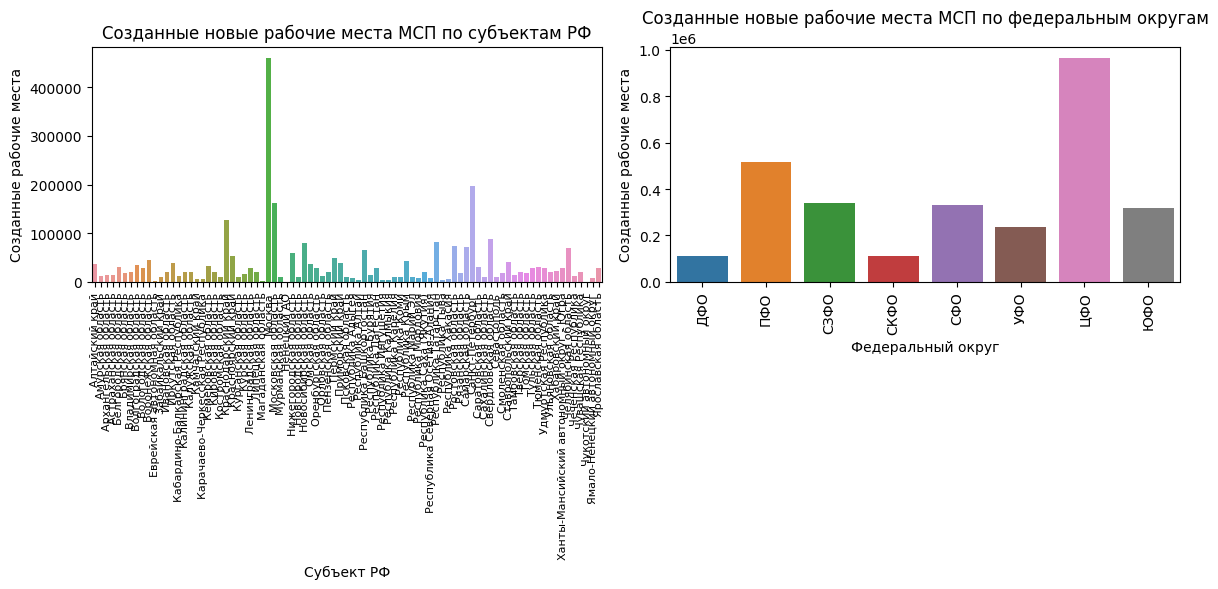

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'Vnovsozd'

# Группировка данных по субъектам РФ и расчет суммарных значений для каждого субъекта
total_by_region = data.groupby('Region')[variable].sum()

# Группировка данных по федеральным округам и расчет суммарных значений для каждого округа
total_by_district = data.groupby('District')[variable].sum()

# Подготовка графиков
plt.figure(figsize=(12, 6))

# График для сравнения по субъектам РФ
plt.subplot(1, 2, 1)
sns.barplot(x=total_by_region.index, y=total_by_region.values)
plt.xticks(rotation=90, fontsize=8)  # Уменьшение шрифта меток оси X
plt.title('Созданные новые рабочие места МСП по субъектам РФ')
plt.xlabel('Субъект РФ')
plt.ylabel('Созданные рабочие места')

# График для сравнения по федеральным округам
plt.subplot(1, 2, 2)
sns.barplot(x=total_by_district.index, y=total_by_district.values)
plt.xticks(rotation=90)
plt.title('Созданные новые рабочие места МСП по федеральным округам')
plt.xlabel('Федеральный округ')
plt.ylabel('Созданные рабочие места')

plt.tight_layout()
plt.show()


Основываясь на графиках, можно сделать следующие выводы:

1. **Сравнительный Анализ по Субъектам РФ**:
   - Распределение созданных новых рабочих мест МСП по субъектам Российской Федерации неравномерное. 
   - Некоторые регионы значительно выделяются по количеству созданных рабочих мест, что указывает на региональные различия в экономической активности или эффективности политики поддержки МСП.
   - Важно также отметить, что в ряде регионов создается гораздо меньше рабочих мест, что может свидетельствовать о различиях в экономической ситуации, доступности ресурсов или государственной поддержке.

2. **Сравнительный Анализ по Федеральным Округам**:
   - Существуют заметные различия в количестве созданных рабочих мест в МСП между разными федеральными округами.
   - Некоторые федеральные округа демонстрируют значительно большее количество созданных рабочих мест по сравнению с другими, что может отражать экономическую активность, населенность или интенсивность государственной поддержки предпринимательства в этих регионах.

### Общие Наблюдения:
- Графики выявляют значительные региональные различия в создании новых рабочих мест в секторе МСП, что может указывать на необходимость более дифференцированного подхода в политике развития и поддержки малого и среднего бизнеса.
- Для более глубокого понимания причин таких различий может потребоваться дополнительный анализ, включающий экономические, демографические, географические и политические факторы, влияющие на развитие МСП в разных регионах.

Эти выводы могут быть полезны для разработки региональных стратегий поддержки и развития малого и среднего предпринимательства, а также для выявления ключевых областей, требующих особого внимания со стороны государственных органов и политиков.